In [3]:
import pandas as pd
import rdkit.Chem as Chem
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
import umap

In [4]:
df = pd.read_csv("datasets/leffingwell/leffingwell_combined.csv")

In [5]:
df['rdkit'] = df.apply(lambda row: Chem.MolFromSmiles(row['IsomericSMILES']), axis=1)

In [6]:
df['morgfp'] = df.apply(lambda row: GetMorganFingerprintAsBitVect(row['rdkit'], radius=3, nBits=2048), axis=1)

In [7]:
umap_model = umap.UMAP(metric = "jaccard",
                       densmap=True,
                       random_state=42,
                       low_memory = False)
X_umap = umap_model.fit_transform(list(df['morgfp']))
df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]

/home/chertian/anaconda3/envs/ml/lib/python3.7/site-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Text(0.5, 0, 'umap1')

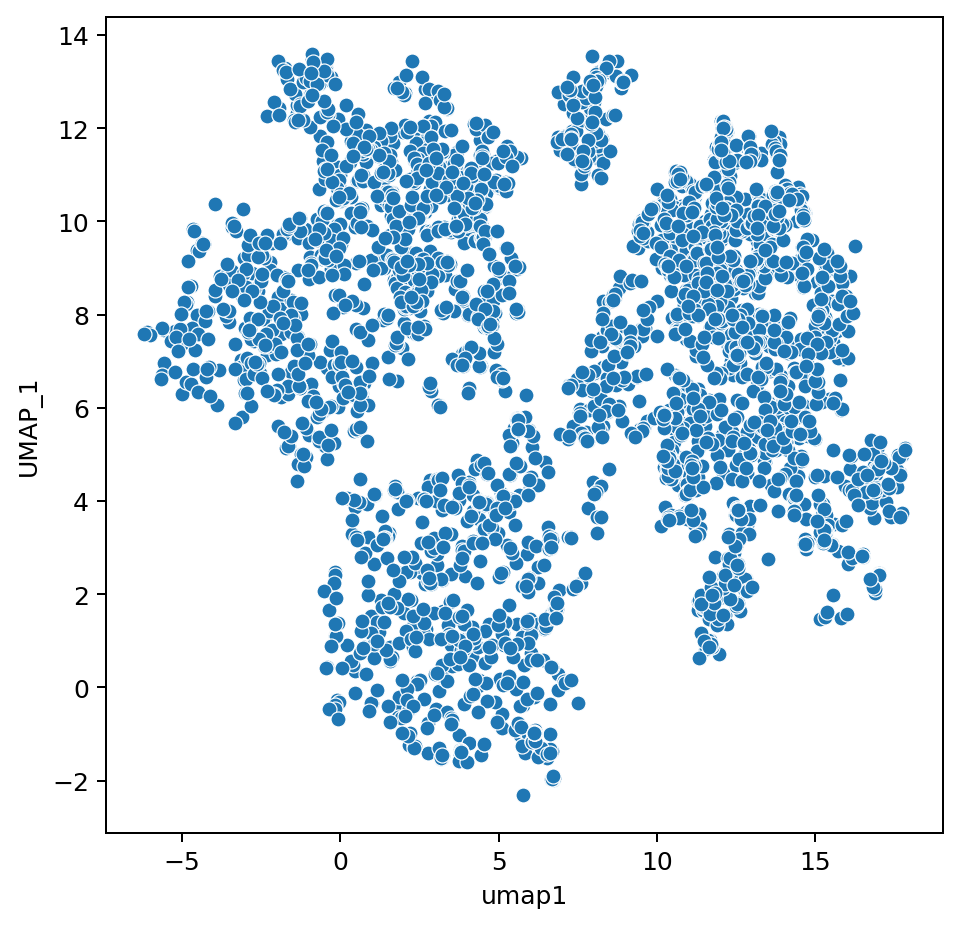

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
g = sns.scatterplot(x="UMAP_0", y="UMAP_1", data=df, ax=ax)





In [9]:
df

,CID,MolecularWeight,IsomericSMILES,IUPACName,name,Stimulus,alcoholic,aldehydic,alliaceous,almond,...,vegetable,violet,warm,waxy,winey,woody,rdkit,morgfp,UMAP_0,UMAP_1
0,-9.553490e+11,240.387,CCCCC=COC(=O)CCCCCCCC,NaN,Hexenyl nonanoate,-9.553490e+11,0,0,0,0,...,0,0,0,1,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80e332710>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.092326,4.771742
1,-9.232100e+11,196.290,CC(=O)OCC1C=CC(C(C)C)CC1,NaN,Tetrahydrocuminyl acetate,-9.232100e+11,0,0,0,0,...,0,0,0,0,0,1,<rdkit.Chem.rdchem.Mol object at 0x7ff80e332760>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.668139,9.518332
2,-8.744080e+11,244.331,CCCCCCCCC(OC(C)=O)C(=O)OC,NaN,Methyl acetoxydecanoate,-8.744080e+11,0,0,0,0,...,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80f645120>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.818192,8.775580
3,-8.739640e+11,198.306,CCCCC=COC(=O)C(C)CCC,NaN,Hexenyl methylvalerate,-8.739640e+11,0,0,0,0,...,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80e332670>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.084306,4.847537
4,-8.628410e+11,148.271,CCCC(S)COCC,NaN,Ethoxymethylbutanethiol,-8.628410e+11,0,0,0,0,...,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80e332800>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.553163,5.567488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,1.542414e+08,222.400,CCC1CSSSC1(CC)CC,"4,4,5-triethyltrithiane","4,4,5-triethyltrithiane",1.542414e+08,0,0,1,0,...,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80eef9bc0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.662057,3.024628
3518,1.553234e+08,126.300,CC(S)SS,1-(disulfanyl)ethanethiol,schembl22694105,1.553234e+08,0,0,1,0,...,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80eef9c10>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14.340937,3.692905
3519,1.586998e+08,174.310,CCC(C)C(=S)OCC(C)C,O-(2-methylpropyl) 2-methylbutanethioate,O-(2-methylpropyl) 2-methylbutanethioate,1.586998e+08,0,0,0,0,...,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80eef9c60>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.995037,8.191692
3520,1.615049e+08,212.330,CCCCCCCC=COC(=O)CCC,non-1-enyl butanoate,non-1-enyl butanoate,1.615049e+08,0,0,0,0,...,0,0,0,1,0,0,<rdkit.Chem.rdchem.Mol object at 0x7ff80eef9cb0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.100199,4.717834
